<a href="https://colab.research.google.com/github/yleessam/tf/blob/main/tensorflow2_x_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np

In [5]:
#train data
#t_data = 2 * x1 -3 * x2 + 2 * x3

x_data = np.array([[1, 2, 0], [5, 4, 3], [1, 2, -1], [3, 1, 0], [2, 4, 2],
                    [4, 1, 2], [-1, 3, 2], [4, 3, 3], [0, 2, 6], [2, 2, 1],
                    [1, -2, -2], [0, 1, 3], [1, 1, 3], [0, 1, 4], [2, 3, 3] ])

t_data = np.array([-4, 4, -6, 3, -4,
                    9, -7, 5, 6, 0,
                    4, 3, 5, 5, 1])


In [6]:

print('x_data.shape = ', x_data.shape, 't_data.shape = ', t_data.shape)

# Linear Regression 을keras 이용하여 생성
model = Sequential()

# 노드 3개인 출력층 생성
model.add(Dense(1, input_shape=(3, ), activation='linear'))

# 학습을 위한 optimizer, 손실함수 loss 정의
model.compile(optimizer=SGD(learning_rate=1e-2), loss= 'mse' )
model.summary()


x_data.shape =  (15, 3) t_data.shape =  (15,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=1000)
end_time = datetime.now()

print('\nElapsed Time => ' , end_time - start_time)


Epoch 1/1000
1/1 [==============================] - 0s 445ms/step - loss: 29.7237
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 26.9880
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 24.8675
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 23.1120
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 21.5920
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 20.2379
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 19.0105
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 17.8862
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 16.8496
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 15.8897
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 14.9979
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 14.1676
Epoch 13/1000
1/1 [=========

In [8]:
# hist 타입 및 key 확인
print(type(hist))
print(hist.history.keys())


<class 'keras.src.callbacks.History'>
dict_keys(['loss'])


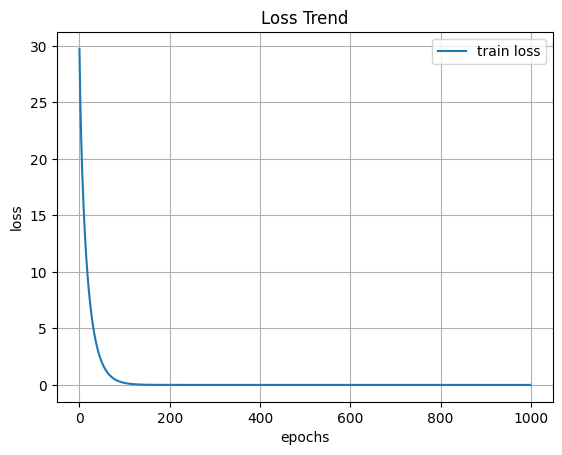

In [11]:
# 손실함수 출력
import matplotlib.pyplot as plt
plt. title( 'Loss Trend' )
plt.xlabel( 'epochs' )
plt.ylabel('loss')
plt.grid()
plt.plot(hist.history['loss'], label= 'train loss' )
plt.legend(loc='best')
plt.show()

In [13]:
#예측, ret_val = 2*x1 -3*x2 + 2*x3
test_data = [[5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ]
ret_val = [ 2*data[0] - 3*data[1] + 2*data[2] for data in test_data ]

prediction_val = model.predict(np.array(test_data))
print (prediction_val)
print('===')
print (ret_val)


1/1 [==============================] - 0s 97ms/step
[[-5.000178 ]
 [-2.9999523]
 [-3.9995685]
 [ 8.999496 ]
 [ 7.0002646]]
===
[-5, -3, -4, 9, 7]


In [14]:
# 모델 입력, 출력, 가중치 확인
print(model.input)
print(model.output)
print(model.weights)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.999949 ],
       [-3.0000536],
       [ 1.9999651]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.00034568], dtype=float32)>]


In [ ]:
#test data
(5, 5, 0), (2, 3, 1), (-1, 0, -1), (10, 5, 2), (4, -1, -2)